In [1]:
from dataclasses import replace

import numpy as np

#
import sequenzo
import pandas as pd
from numpy.ma.core import cumprod
from pywin.framework.editor.configui import paletteVGA
from sequenzo import *

In [2]:
#
df = pd.read_csv('D:/college/research/QiQi/sequenzo/files/orignal data/Sohee_New/seq_wide_1.csv')
df

Unnamed: 0    PID              race_recode sex_recode  medu  phealth_40  \
0              1      2  Non-Black, Non-Hispanic     Female     5           5   
1              2      3  Non-Black, Non-Hispanic     Female    10           1   
2              3      6  Non-Black, Non-Hispanic       Male    12           5   
3              4      8  Non-Black, Non-Hispanic     Female     9           3   
4              5     11  Non-Black, Non-Hispanic       Male    12           5   
...          ...    ...                      ...        ...   ...         ...   
5851        5852  12515                    Black     Female     8           5   
5852        5853  12516                    Black     Female     8           5   
5853        5854  12517                    Black       Male     7           5   
5854        5855  12558                    Black     Female    12           5   
5855        5856  12643                    Black       Male    -3           5   

      mhealth_40  birth_year  edu_age21  hl_age21  ...  35m3  35m4  35m5  \
0              6        1959          9         0  ...  10.0  10.0  10.0   
1              6        1962         10         0  ...  12.0  12.0  12.0   
2              5        1961         14         0  ...   8.0   8.0   8.0   
3              6        1959         12         1  ...   8.0   8.0   8.0   
4              6        1960         15         0  ...   4.0   4.0   4.0   
...          ...         ...        ...       ...  ...   ...   ...   ...   
5851           5        1959         10         0  ...   4.0   4.0   4.0   
5852           7        1960         12         0  ...  11.0  11.0  11.0   
5853           7        1963         12         0  ...   4.0   4.0   4.0   
5854           4        1959         11         0  ...  11.0  11.0  11.0   
5855           6        1958         12         0  ...   4.0   4.0   4.0   

      35m6  35m7  35m8  35m9  35m10  35m11  35m12  
0     10.0  10.0  10.0  10.0   10.0   10.0   10.0  
1     12.0  12.0   4.0   4.0   11.0   11.0   11.0  
2      7.0   7.0   7.0   7.0    7.0    7.0    7.0  
3      8.0   8.0   8.0   8.0    8.0    8.0    8.0  
4      4.0   4.0   4.0   4.0    4.0    4.0    4.0  
...    ...   ...   ...   ...    ...    ...    ...  
5851   4.0   4.0   4.0   4.0    4.0    4.0    4.0  
5852  11.0  11.0  11.0  11.0   11.0   11.0   11.0  
5853   4.0   4.0   4.0   4.0    4.0    4.0    4.0  
5854  11.0  11.0  11.0  11.0   11.0   11.0   11.0  
5855   4.0   4.0   4.0   4.0    4.0    4.0    4.0  

[5856 rows x 178 columns]

In [3]:
# 1. Fill real NaNs with "missing"
time_list = list(df.columns)[11:178]
# states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']
states = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
labels = [
    "Employed: 10–19",  # 1
    "Employed: 20–29",  # 2
    "Employed: 30–39",  # 3
    "Employed: 40–49",  # 4
    "Employed: 50–59",  # 5
    "Employed: 60–69",  # 6
    "Employed: 70–79",  # 7
    "Education",        # 8
    "Family leave",     # 9
    "Unemployed",       # 10
    "Gap/Out of Labor Force",  # 11
    "Active duty (military)"   # 12
]


In [4]:
activity_color = [ "#fff7bc",  # Employed: 10–19
    "#fee391",  # Employed: 20–29
    "#fec44f",  # Employed: 30–39
    "#fe9929",  # Employed: 40–49
    "#ec7014",  # Employed: 50–59
    "#cc4c02",  # Employed: 60–69
    "#993404",  # Employed: 70–79
    "#ffffff",  # Education
    "#9467bd",  # Family leave
    "#636363",  # Unemployed
    "#000000",  # Gap/Out of Labor Force
    "#969696", "#d3d3d3"
]

activity_labels = [  "Employed: 10–19",  # 1
    "Employed: 20–29",  # 2
    "Employed: 30–39",  # 3
    "Employed: 40–49",  # 4
    "Employed: 50–59",  # 5
    "Employed: 60–69",  # 6
    "Employed: 70–79",  # 7
    "Education",        # 8
    "Family leave",     # 9
    "Unemployed",       # 10
    "Gap/Out of Labor Force",  # 11
    "Active duty (military)",  # 12
    # "missing"
] 



In [5]:
sequence_data = SequenceData(
    df,
    time=time_list,
    id_col="PID",
    time_type="age",
    states=states, labels=activity_labels,
    custom_colors = activity_color
)

[!] Detected missing values (empty cells) in the sequence data.
    → Automatically added np.nan to `states` and `labels` for compatibility.
    However, it's strongly recommended to manually include it when defining `states` and `labels`.
    For example:

        states = [At Home, Left Home, np.nan]
        labels = [At Home, Left Home, Missing]

    This ensures consistent color mapping and avoids unexpected visualization errors.

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 5856
[>] Number of time points: 167
[>] Min/Max sequence length: 44 / 167
[>] There are 4924 missing values across 539 sequences.
    First few missing sequence IDs: [11, 32, 82, 95, 141, 144, 150, 156, 208, 229] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
4415                   123
6099                    78
4970                    76
7

🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
       Missing Count  Missing (%)
28m7              50         0.85
28m8              48         0.82
28m9              48         0.82
28m12             47         0.80
31m9              46         0.79
...              ...          ...
35m10             17         0.29
34m11             17         0.29
34m12             17         0.29
35m12             16         0.27
35m11             15         0.26

[168 rows x 2 columns]

[Top 5 Rows with Most Missing Values]
      Missing Count
2733            123
3728             79
3050             77
3375             70
4390             69


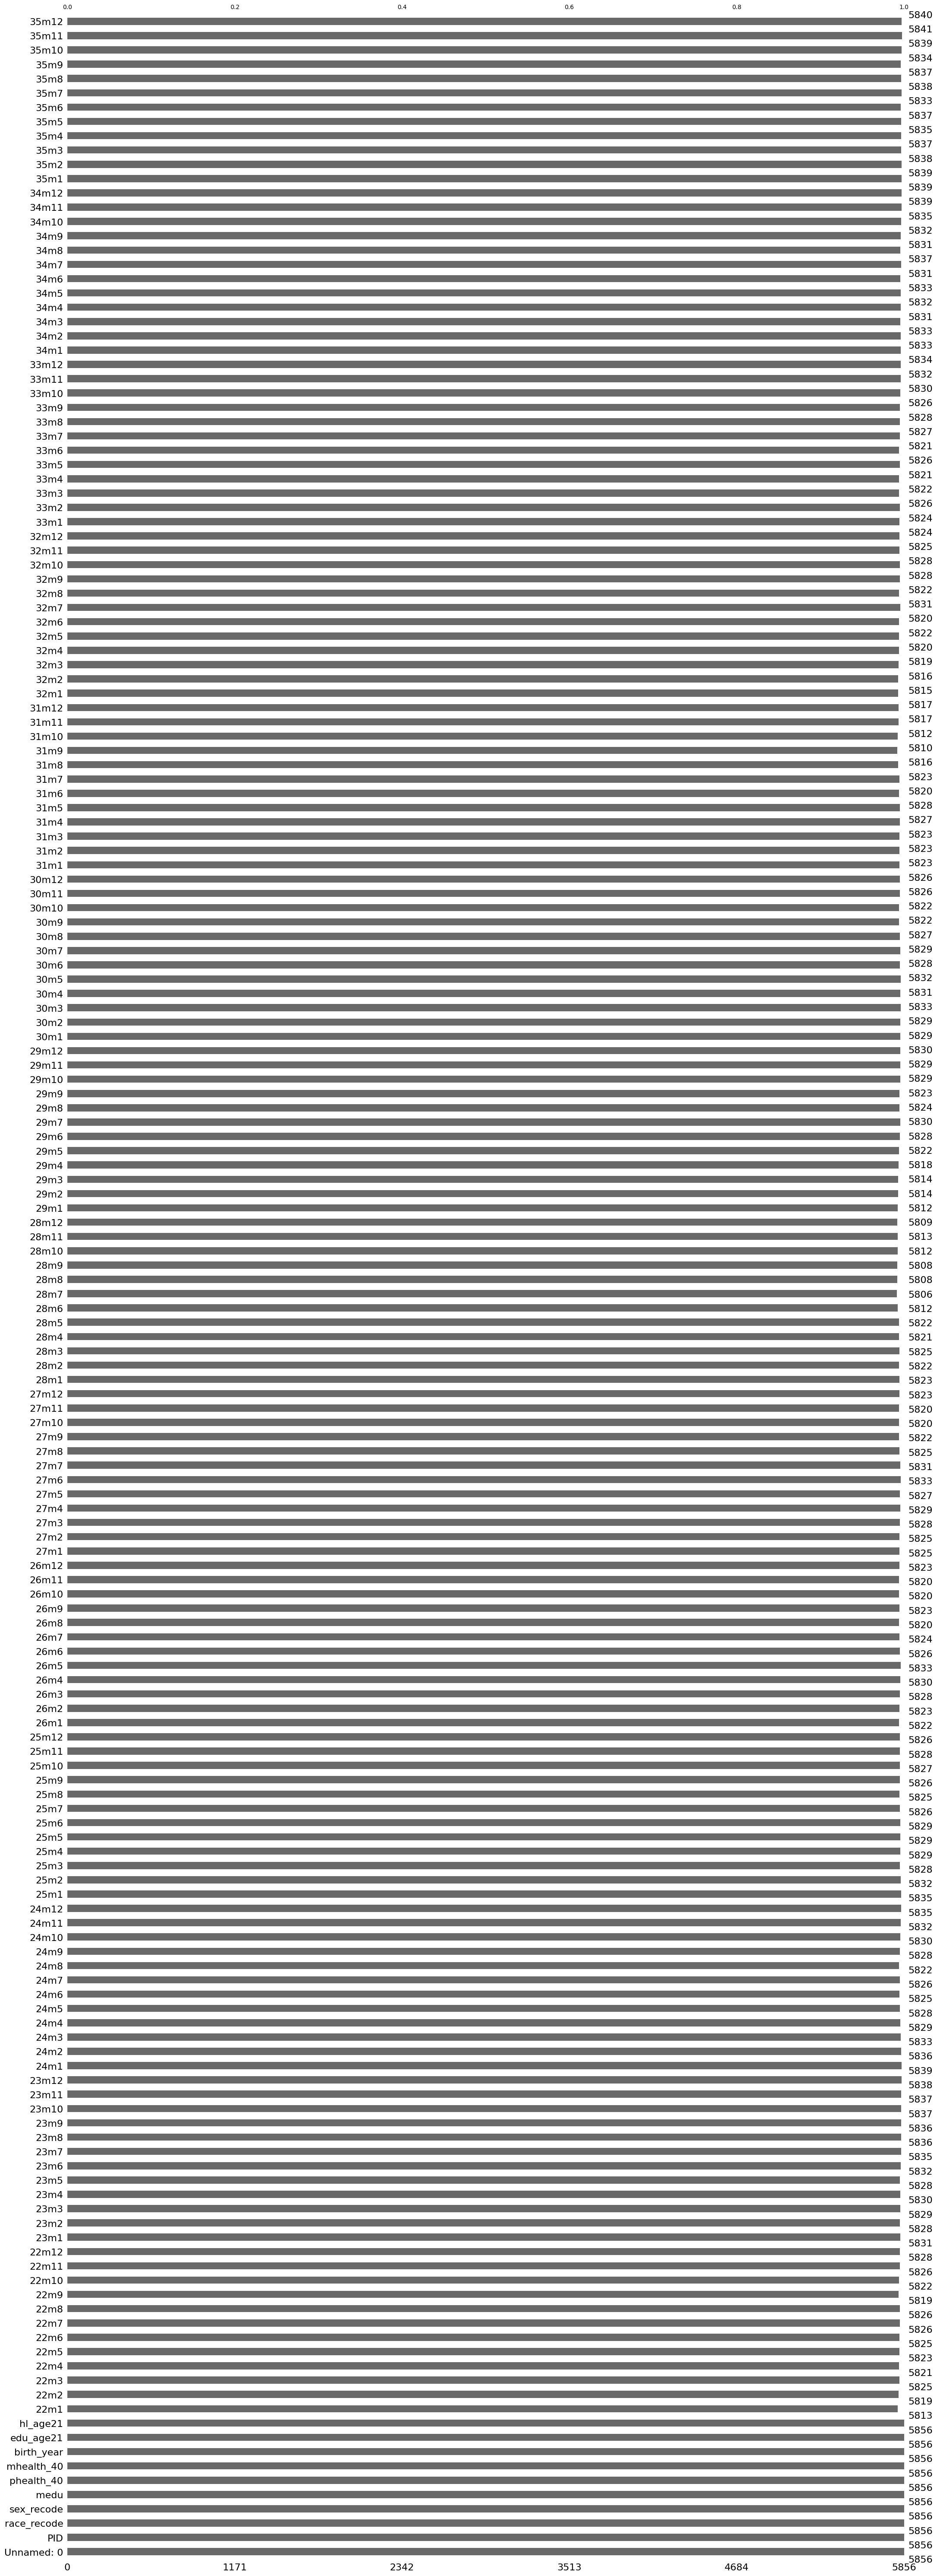

In [9]:
summarize_missing_values(df, mode ='bar')

🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
       Missing Count  Missing (%)
28m7              50         0.85
28m8              48         0.82
28m9              48         0.82
28m12             47         0.80
31m9              46         0.79
...              ...          ...
34m11             17         0.29
24m1              17         0.29
35m10             17         0.29
35m12             16         0.27
35m11             15         0.26

[167 rows x 2 columns]

[Top 5 Rows with Most Missing Values]
      Missing Count
2733            123
3728             78
3050             76
4390             69
3375             69


<Figure size 1000x500 with 0 Axes>

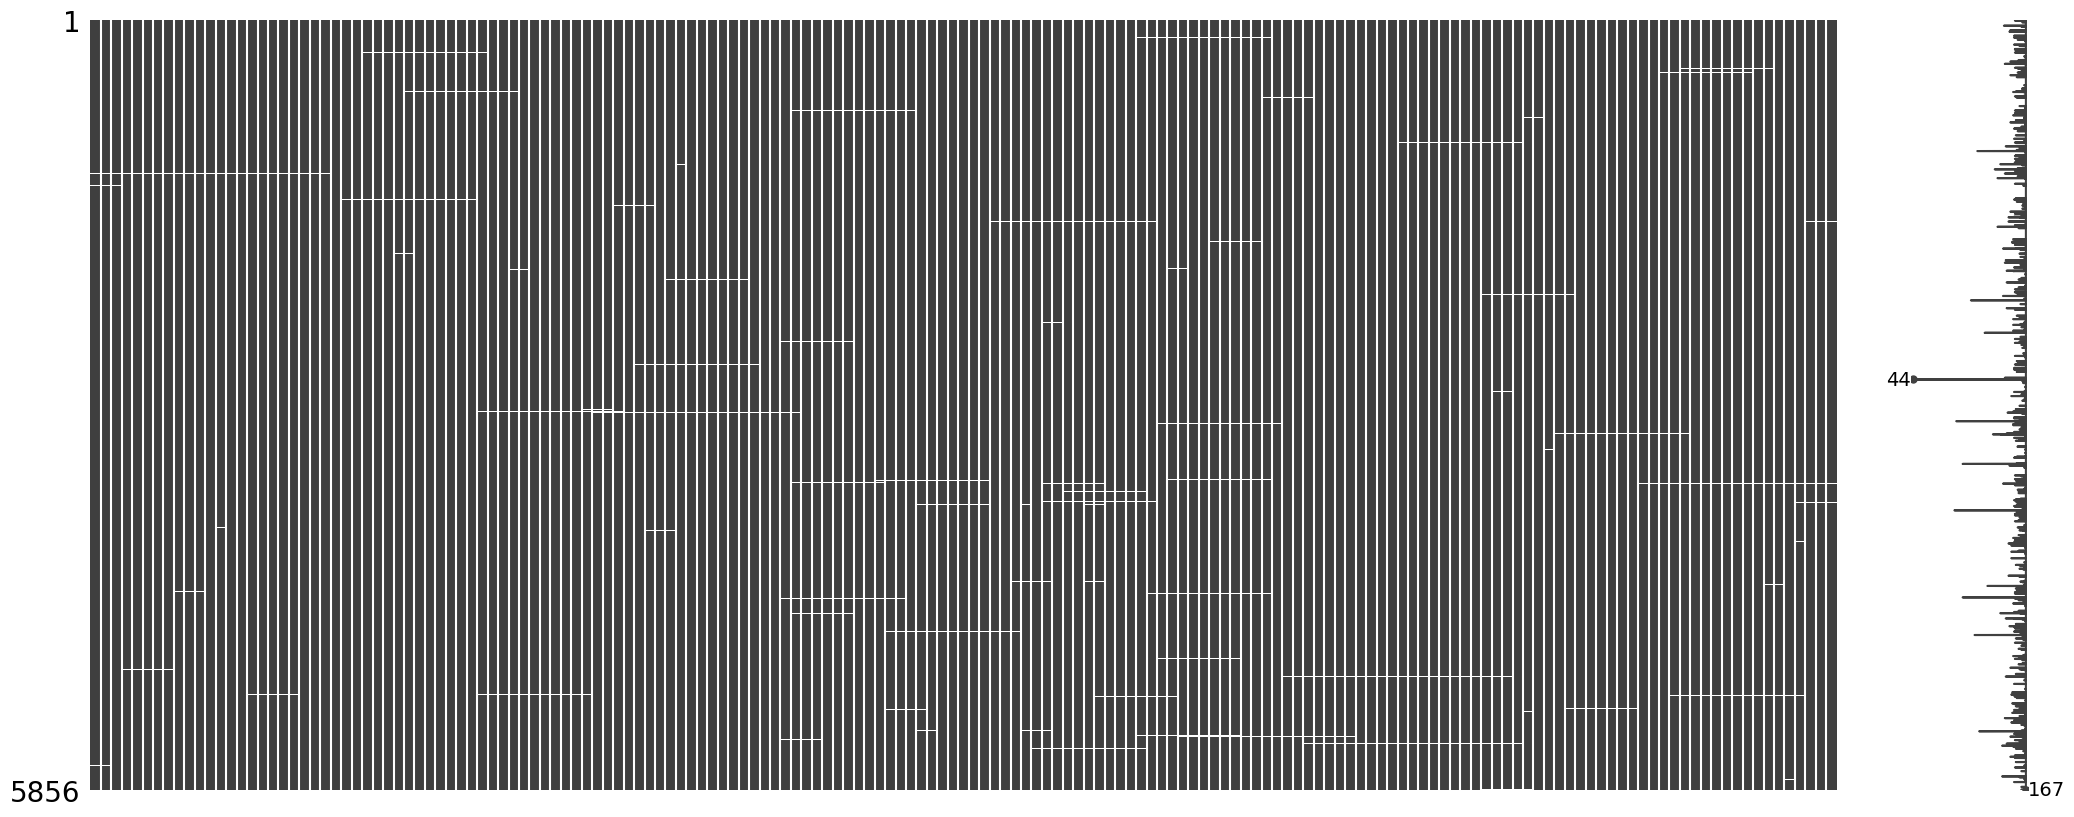

In [10]:
summarize_missing_values(df, columns = time_list)

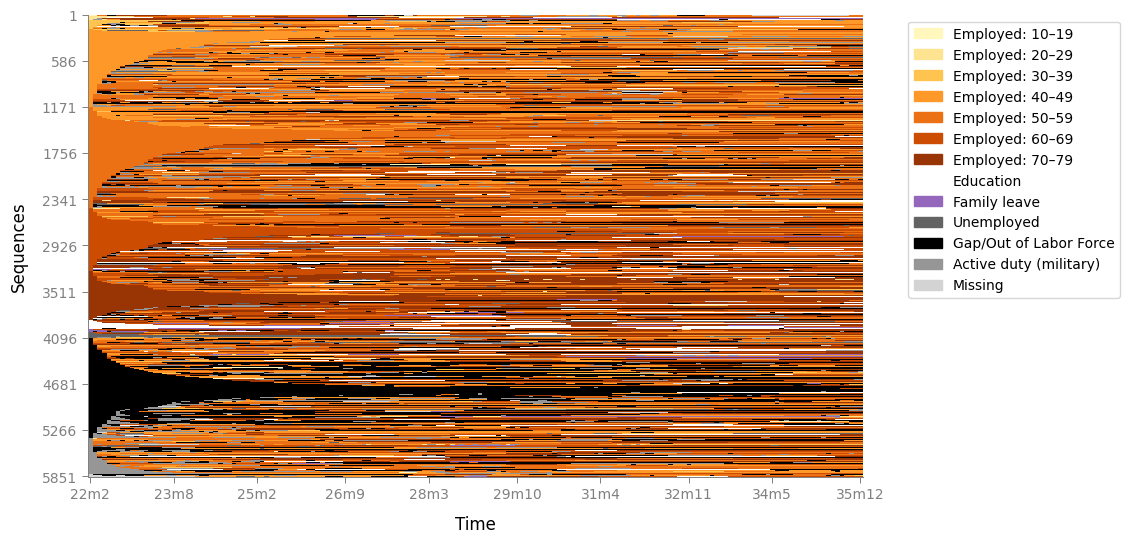

<Figure size 640x480 with 0 Axes>

In [11]:
from sequenzo import plot_sequence_index

# Define your custom color palette
custom_colors = [
      # Active duty (military)
]

# Plot with custom colors
plot_sequence_index(
    sequence_data,
    # custom_colors=custom_colors,
    save_as='index_plot'
)


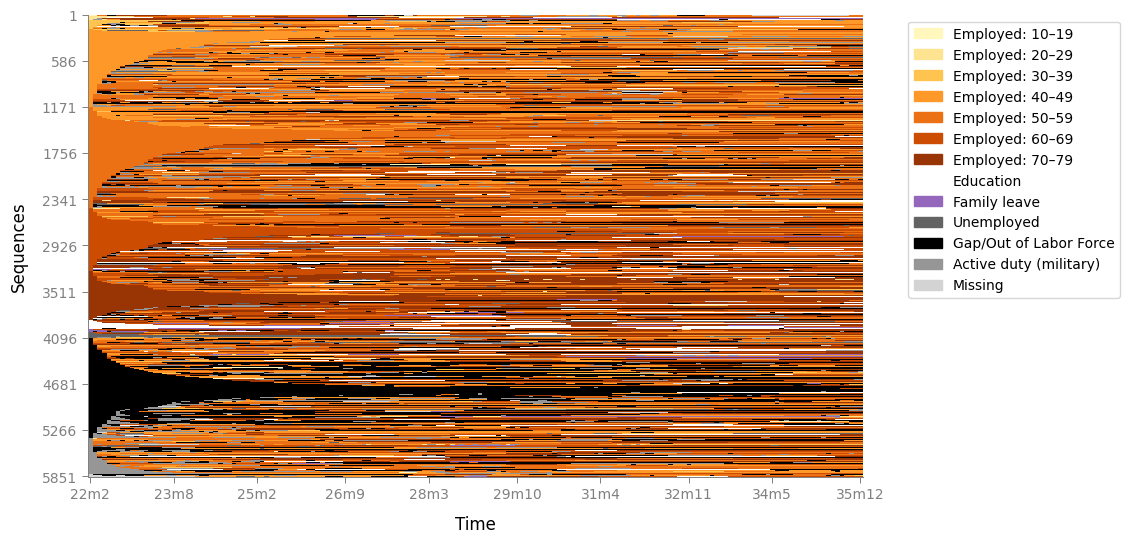

<Figure size 640x480 with 0 Axes>

In [12]:

plot_sequence_index(sequence_data, save_as='index_plot')
# order

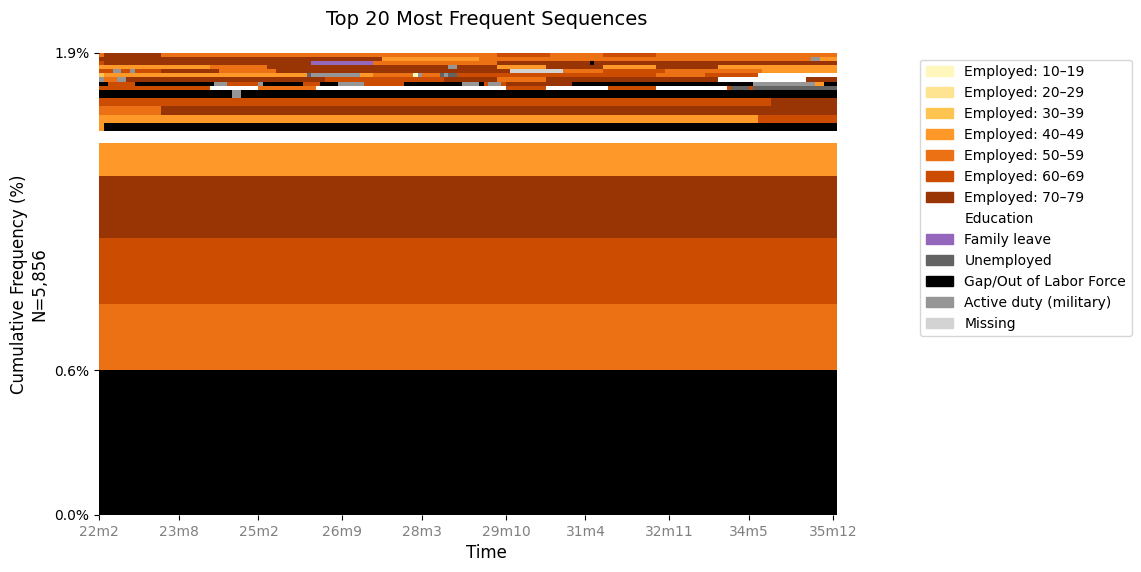

<Figure size 640x480 with 0 Axes>

In [13]:
plot_most_frequent_sequences(sequence_data, save_as='top20seq', top_n=20)
## for the most top 3 sequences, they don't switch their states. They are working full time +white collar or full-time + blue collar, and part-time white-collar.

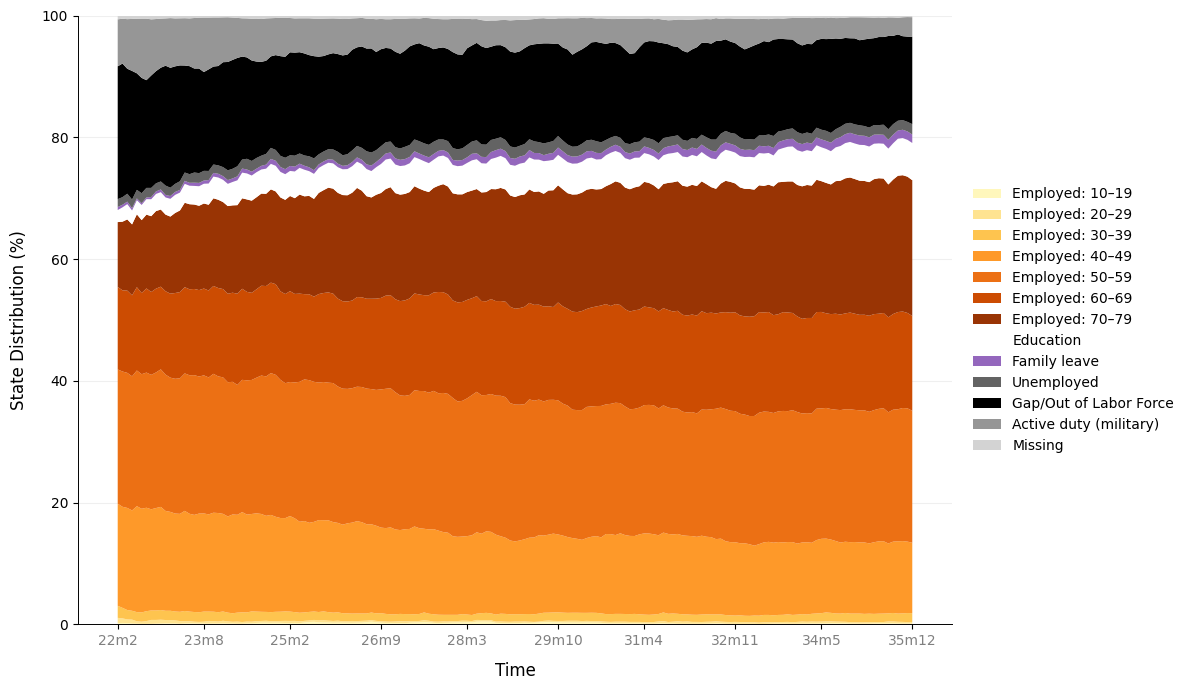

<Figure size 640x480 with 0 Axes>

In [14]:
plot_state_distribution(sequence_data, save_as='test')

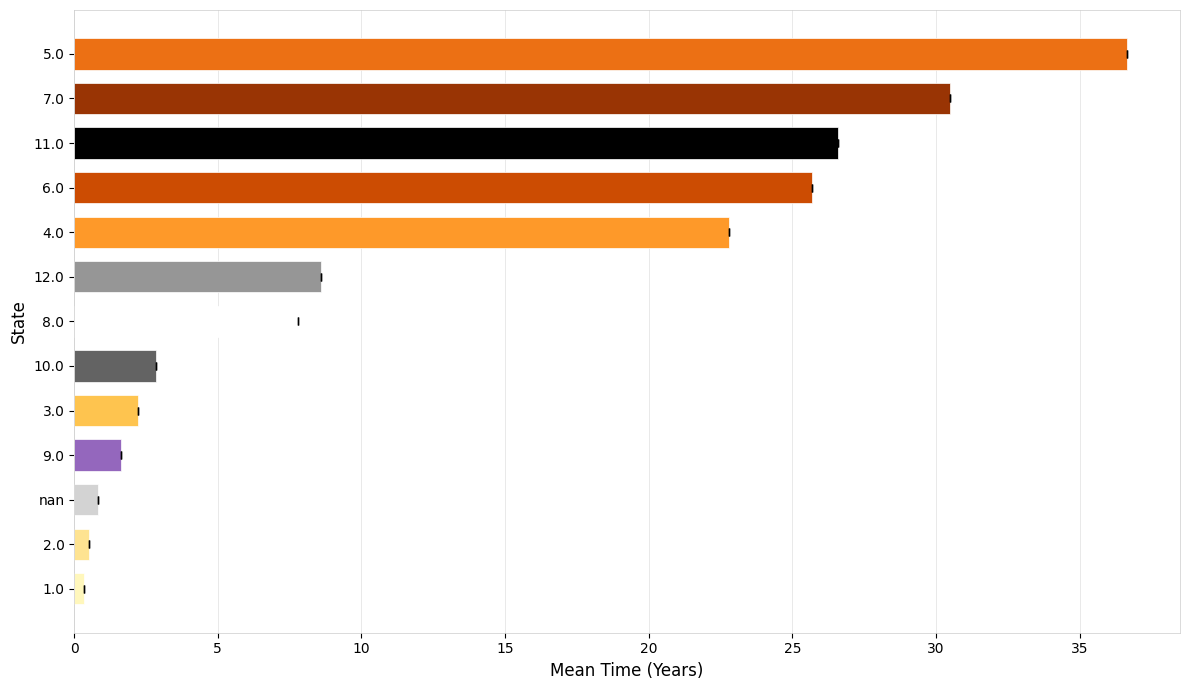

<Figure size 640x480 with 0 Axes>

In [6]:
plot_mean_time(sequence_data)

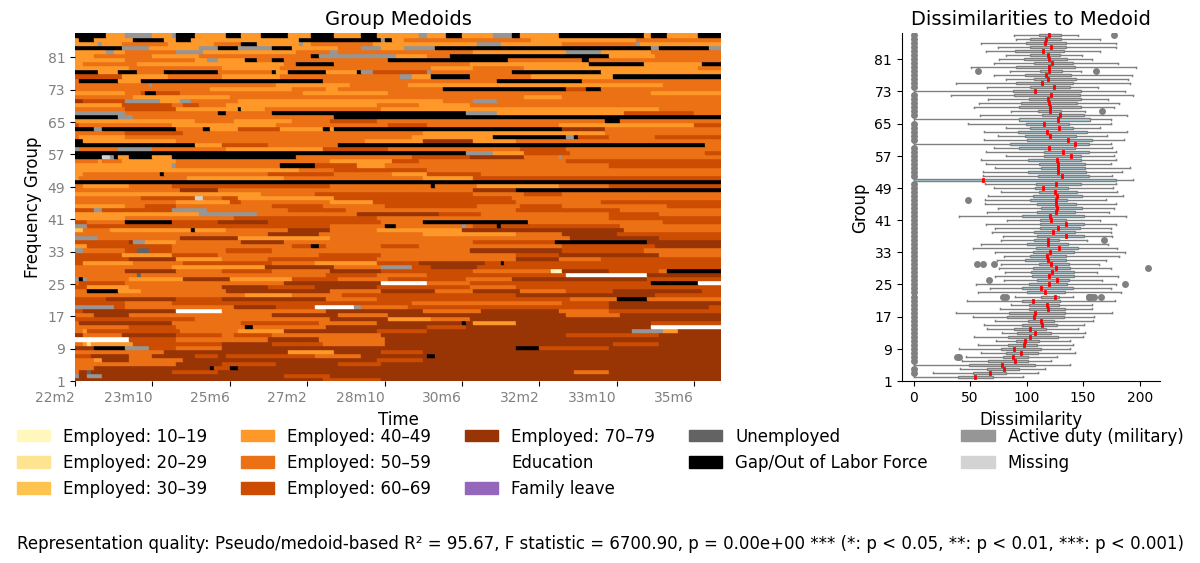

<Figure size 640x480 with 0 Axes>

In [16]:
plot_relative_frequency(seqdata= sequence_data, distance_matrix = Omspell, num_groups = 86, dpi = 200, save_as='rf')

# OMspell


In [27]:
Omspell = get_distance_matrix(seqdata=sequence_data,
                                    method = 'OMspell',
                                    expcost = 0.5, indel =2,
                                    sm= "TRATE", with_missing=True)

[>] Processing 6576 sequences with 15 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Active duty (military), Employed: 10–19, Employed: 20–29, Employed: 30–39, Employed: 40–49, Employed: 50–59, Employed: 60–69, Employed: 70–79, OLF: Education, OLF: Family reasons, OLF: Health reasons, OLF: Military reasons, OLF: Other reasons, Unemployed, Missing]
[>] Indel cost generated.



C:\Sohee\2025 spring\sequenzo\.venv\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


[>] Identified 6459 unique spell sequences.
[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


In [25]:
Omspell

2           3           6           8           13          16     \
2        0.000000  126.500000    0.000000   76.000000   61.000000   83.500000   
3      126.500000    0.000000  126.500000   91.252129  112.500000  103.884870   
6        0.000000  126.500000    0.000000   76.000000   61.000000   83.500000   
8       76.000000   91.252129   76.000000    0.000000   49.000000   72.500000   
13      61.000000  112.500000   61.000000   49.000000    0.000000   38.471326   
...           ...         ...         ...         ...         ...         ...   
12303  121.000000  143.421661  121.000000  138.921661  123.921661  128.467406   
12304  135.936395   84.452800  135.936395  111.828170  131.872791  131.194057   
12305   87.000000   87.335483   87.000000   64.904620   48.000000   42.315734   
12517  126.936395  123.310728  126.936395  132.810728  122.962184  126.315734   
12558  142.500000   57.698700  142.500000  116.315442  134.500000  127.936395   

            17          18          19          20     ...       12260  \
2       18.000000    0.000000  119.500000   44.000000  ...    0.000000   
3      126.442435  126.500000   84.942435  110.500000  ...  126.500000   
6       18.000000    0.000000  119.500000   44.000000  ...    0.000000   
8       79.000000   76.000000  123.500000   74.000000  ...   76.000000   
13      59.971326   61.000000  118.317802   27.873299  ...   61.000000   
...           ...         ...         ...         ...  ...         ...   
12303  124.000000  121.000000  125.467406  123.967406  ...  121.000000   
12304  134.815226  135.936395   78.436395  129.872791  ...  135.936395   
12305   79.942435   87.000000  114.444503   46.000000  ...   87.000000   
12517  125.878831  126.936395  110.373299  120.936395  ...  126.936395   
12558  137.436395  142.500000   86.936395  135.500000  ...  142.500000   

            12278       12281       12282       12284       12303       12304  \
2      137.462184  158.436395  132.962184    0.000000  121.000000  135.936395   
3       85.854895  112.858056  110.260495  126.500000  143.421661   84.452800   
6      137.462184  158.436395  132.962184    0.000000  121.000000  135.936395   
8      127.232064  135.248736  125.899851   76.000000  138.921661  111.828170   
13     136.297667  154.372791  131.797667   61.000000  123.921661  131.872791   
...           ...         ...         ...         ...         ...         ...   
12303  126.500000  145.500000  131.000000  121.000000    0.000000  127.000000   
12304   58.399851  111.438888   93.854895  135.936395  127.000000    0.000000   
12305  122.208782  142.233555  121.661582   87.000000  132.921661  116.759344   
12517  107.312187  115.500000  113.751075  126.936395   39.000000  105.843322   
12558   86.774312  106.934812  115.260495  142.500000  149.421661   88.452800   

            12305       12517       12558  
2       87.000000  126.936395  142.500000  
3       87.335483  123.310728   57.698700  
6       87.000000  126.936395  142.500000  
8       64.904620  132.810728  116.315442  
13      48.000000  122.962184  134.500000  
...           ...         ...         ...  
12303  132.921661   39.000000  149.421661  
12304  116.759344  105.843322   88.452800  
12305    0.000000  118.889067  118.309186  
12517  118.889067    0.000000  131.343322  
12558  118.309186  131.343322    0.000000  

[4325 rows x 4325 columns]

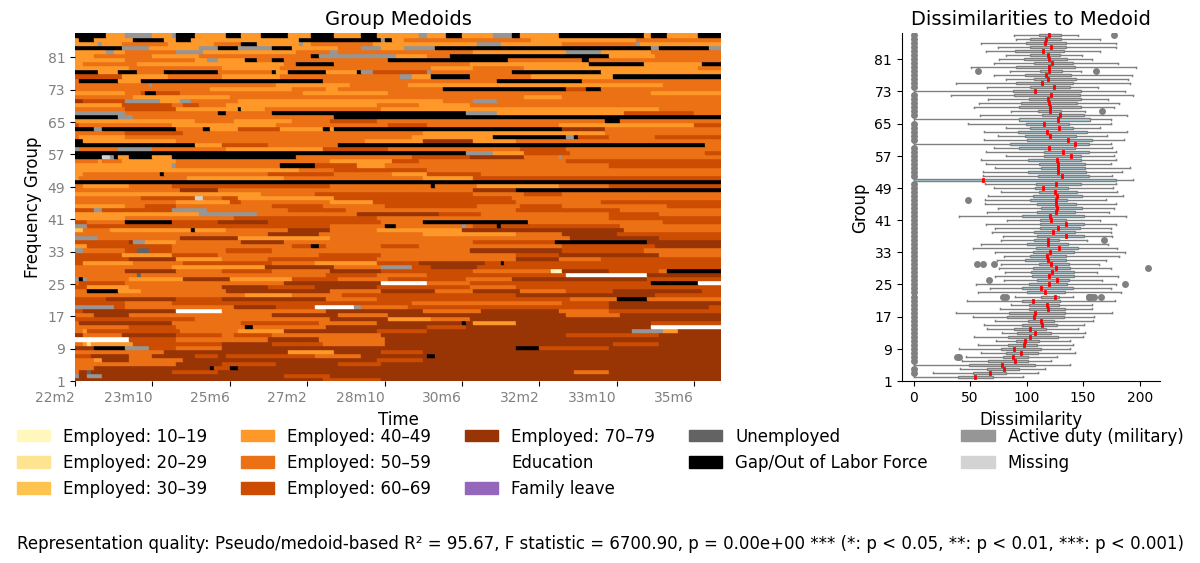

<Figure size 640x480 with 0 Axes>

In [17]:
plot_relative_frequency(sequence_data,distance_matrix = Omspell, num_groups=86, save_as='rf_plot')

[>] Converting DataFrame to NumPy array...


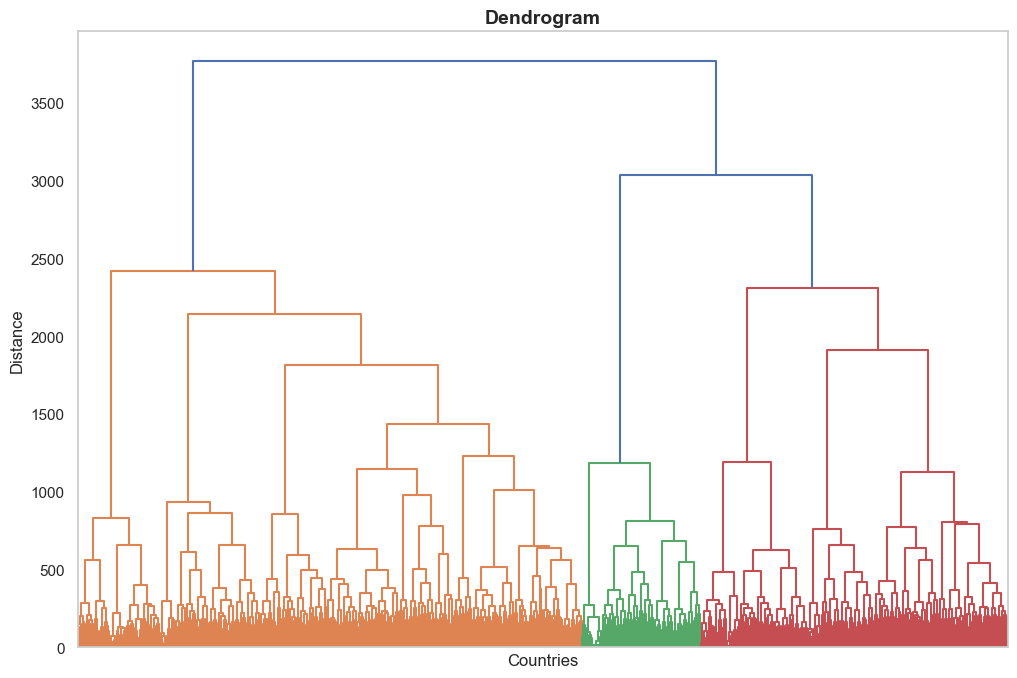

<Figure size 640x480 with 0 Axes>

In [18]:
cluster = Cluster(Omspell, sequence_data.ids, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")
# Hierarchical: combine similar individuals together (bottom-up), stable, calculate variation, how you two get combined as a branch based on variation
# PAM: several dots, how many clusters you want (k-medoid choose the distance that minimize the distance between local nods), randomly choose one.
# kmean: doesn't identify real representative nods


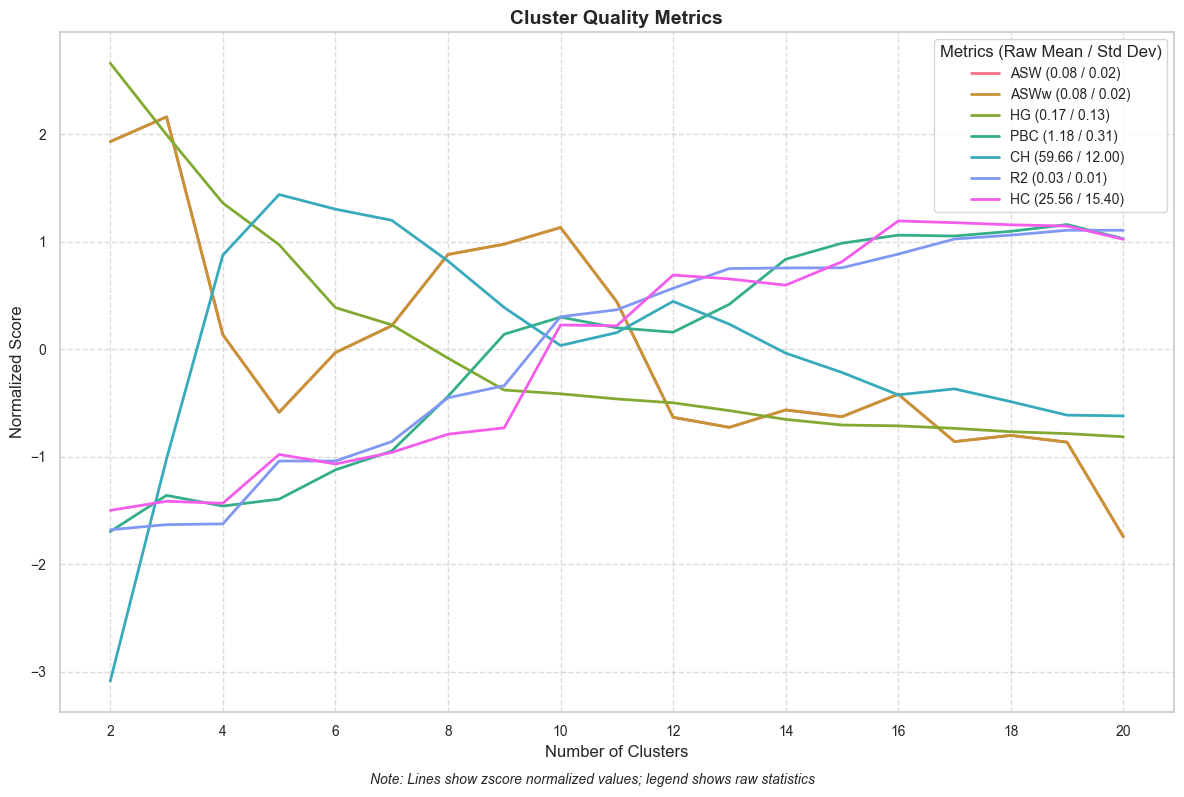

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              3    2.159912       2.159912            1.0
1   ASWw              3    2.159912       2.159912            1.0
2     HG              2    2.658918       2.658918            1.0
3    PBC             19    1.158416       1.158416            1.0
4     CH              5    1.437594       1.437594            1.0
5     R2             20    1.105365       1.105365            1.0
6     HC             16    1.191969       1.191969            1.0


<Figure size 640x480 with 0 Axes>

In [19]:
# Create a cluster_quality.compute_cluster_quality_scores
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)


      Entity ID  Cluster
0             2        3
1             3        4
2             6        1
3             8        2
4            11        3
...         ...      ...
5851      12515        7
5852      12516        4
5853      12517        6
5854      12558        4
5855      12643        3

[5856 rows x 2 columns]
   Cluster  Count  Percentage
0        1    521        8.90
1        2    628       10.72
2        3   2027       34.61
3        4    751       12.82
4        5    671       11.46
5        6    416        7.10
6        7    842       14.38


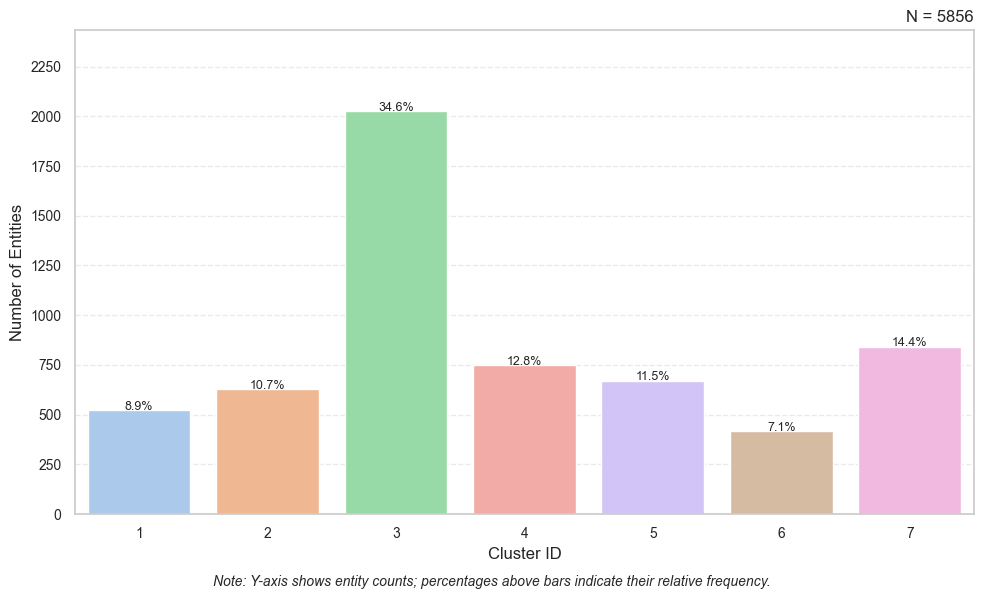

<Figure size 640x480 with 0 Axes>

In [20]:

cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=7)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=7)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=7, save_as="distribution.png", title=None)

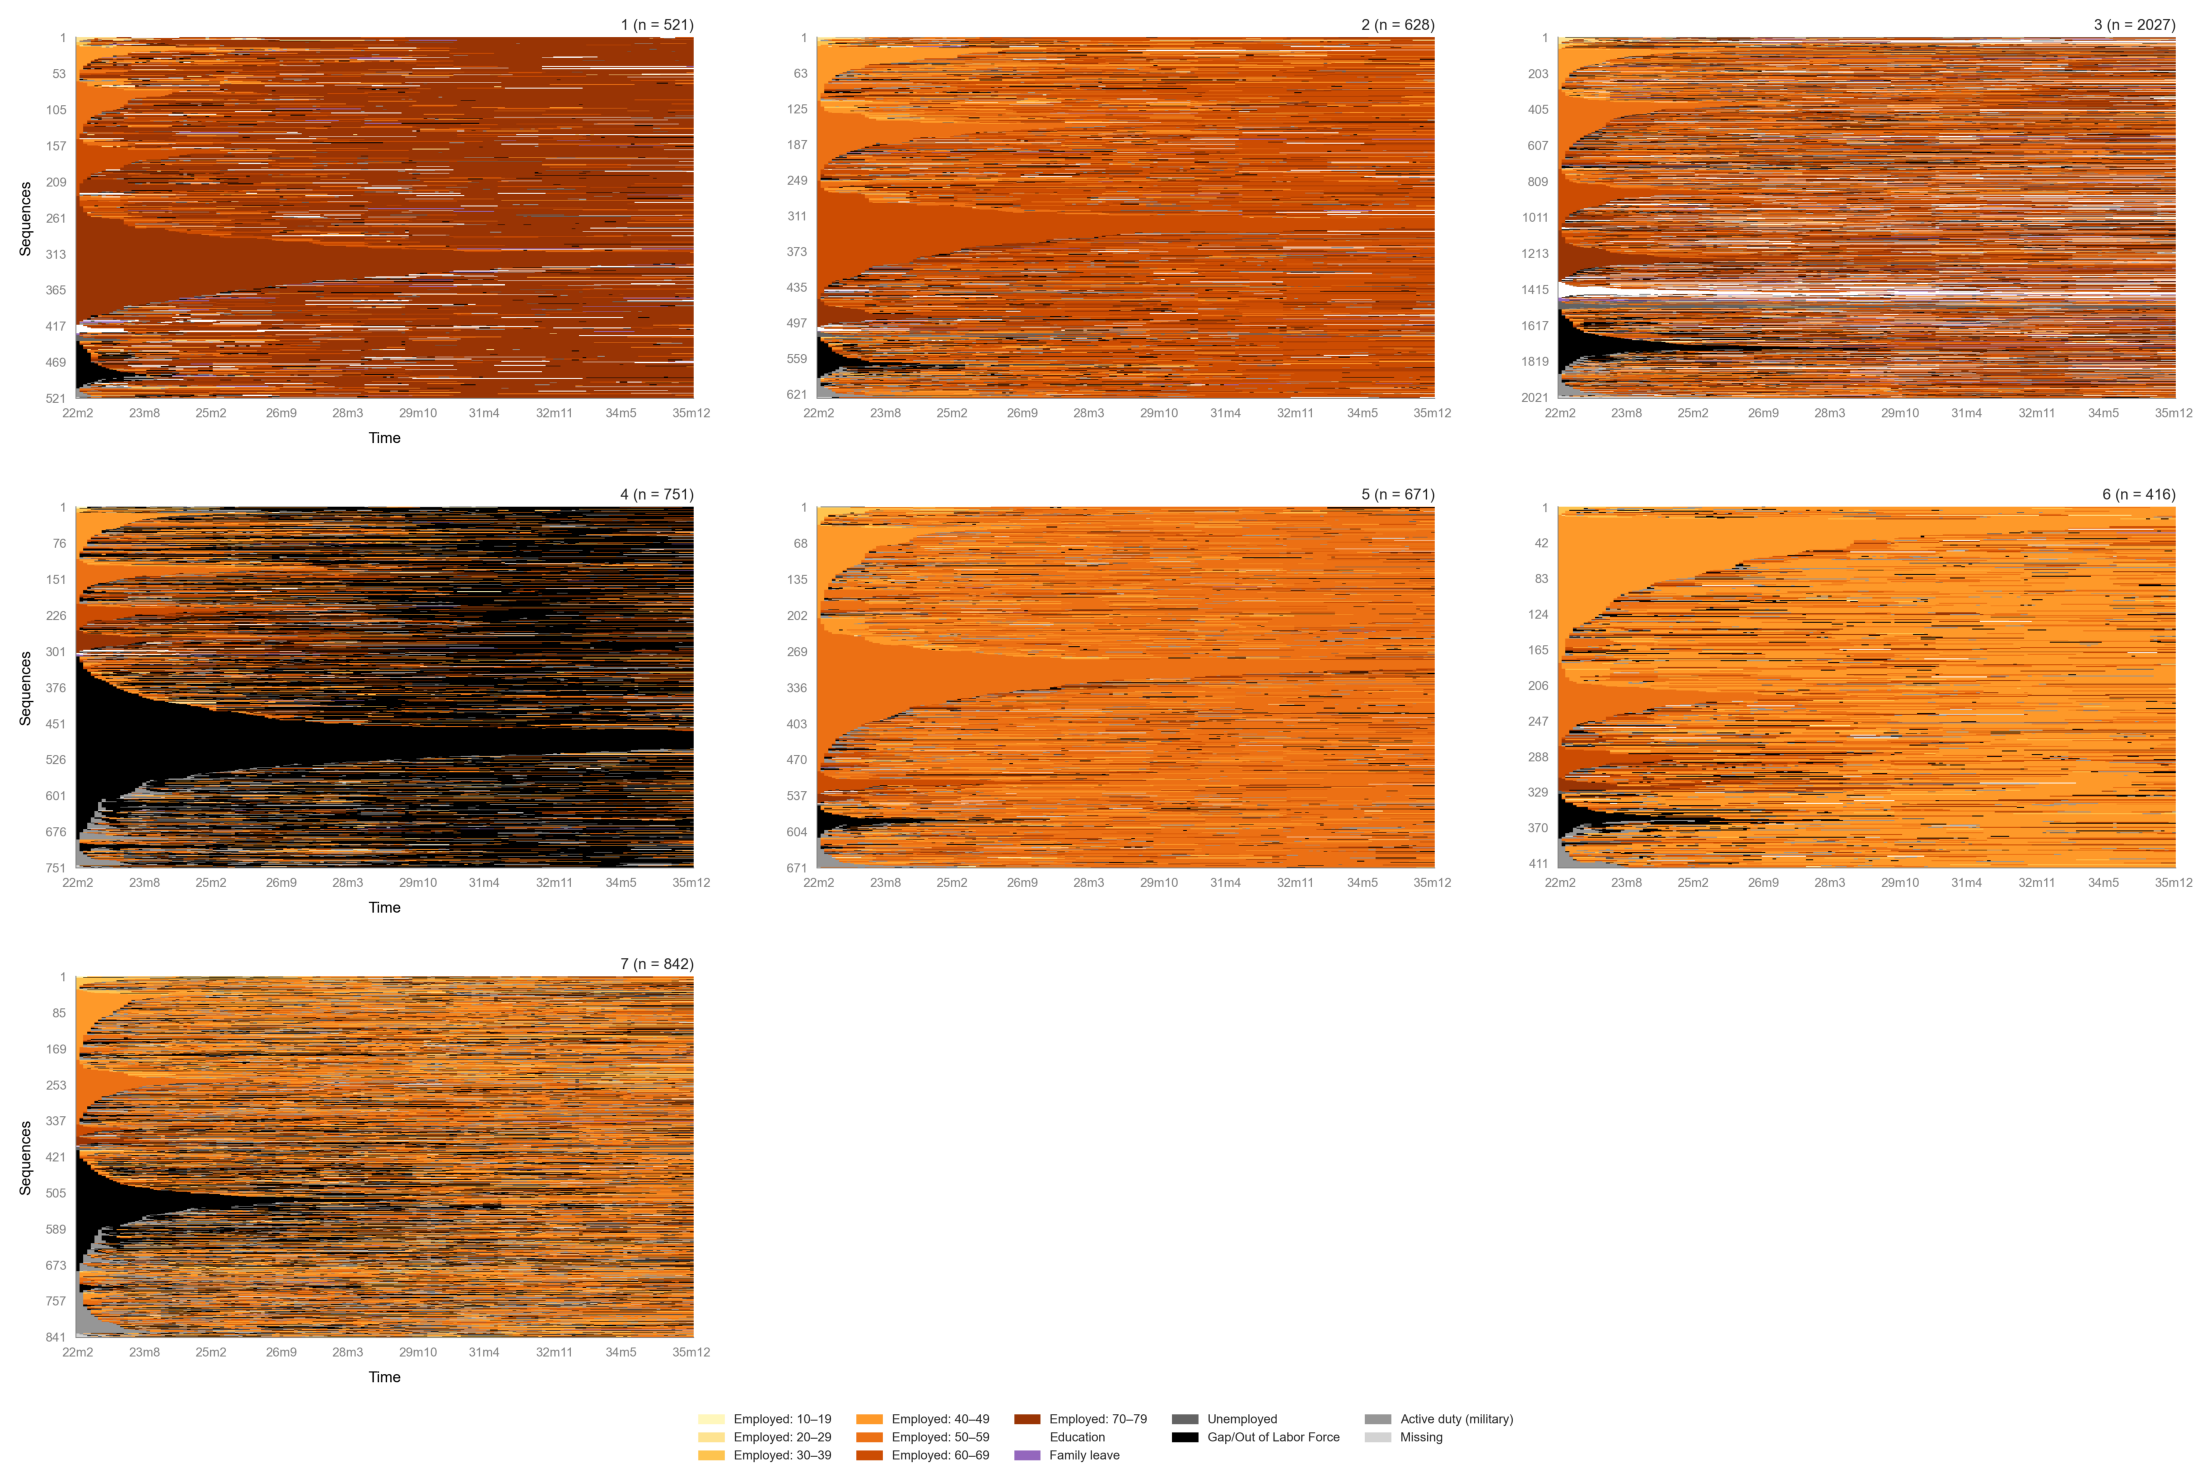

In [22]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster',
                    nrows=3,
                    ncols=3,
                    save_as='cluster_index_plot_7')


plot_sequenceseqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    nrows=3,
                    ncols=3,
                    save_as='cluster_index_plot_7')

      Entity ID  Cluster
0             2        2
1             3        3
2             6        1
3             8        2
4            11        2
...         ...      ...
5851      12515        4
5852      12516        3
5853      12517        4
5854      12558        3
5855      12643        2

[5856 rows x 2 columns]
   Cluster  Count  Percentage
0        1    521        8.90
1        2   2655       45.34
2        3    751       12.82
3        4   1929       32.94


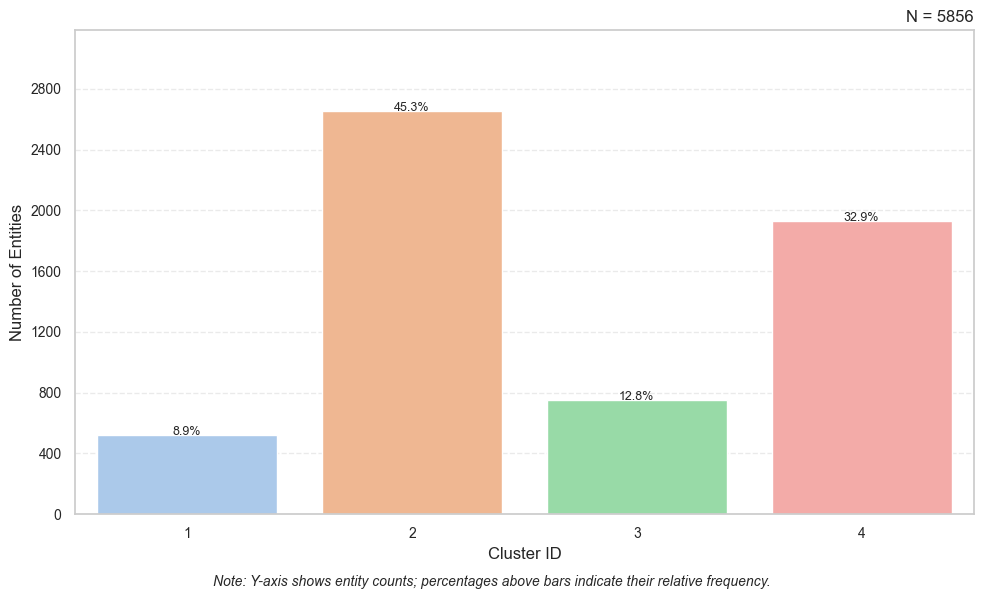

<Figure size 640x480 with 0 Axes>

In [23]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=4, save_as="distribution.png", title=None)

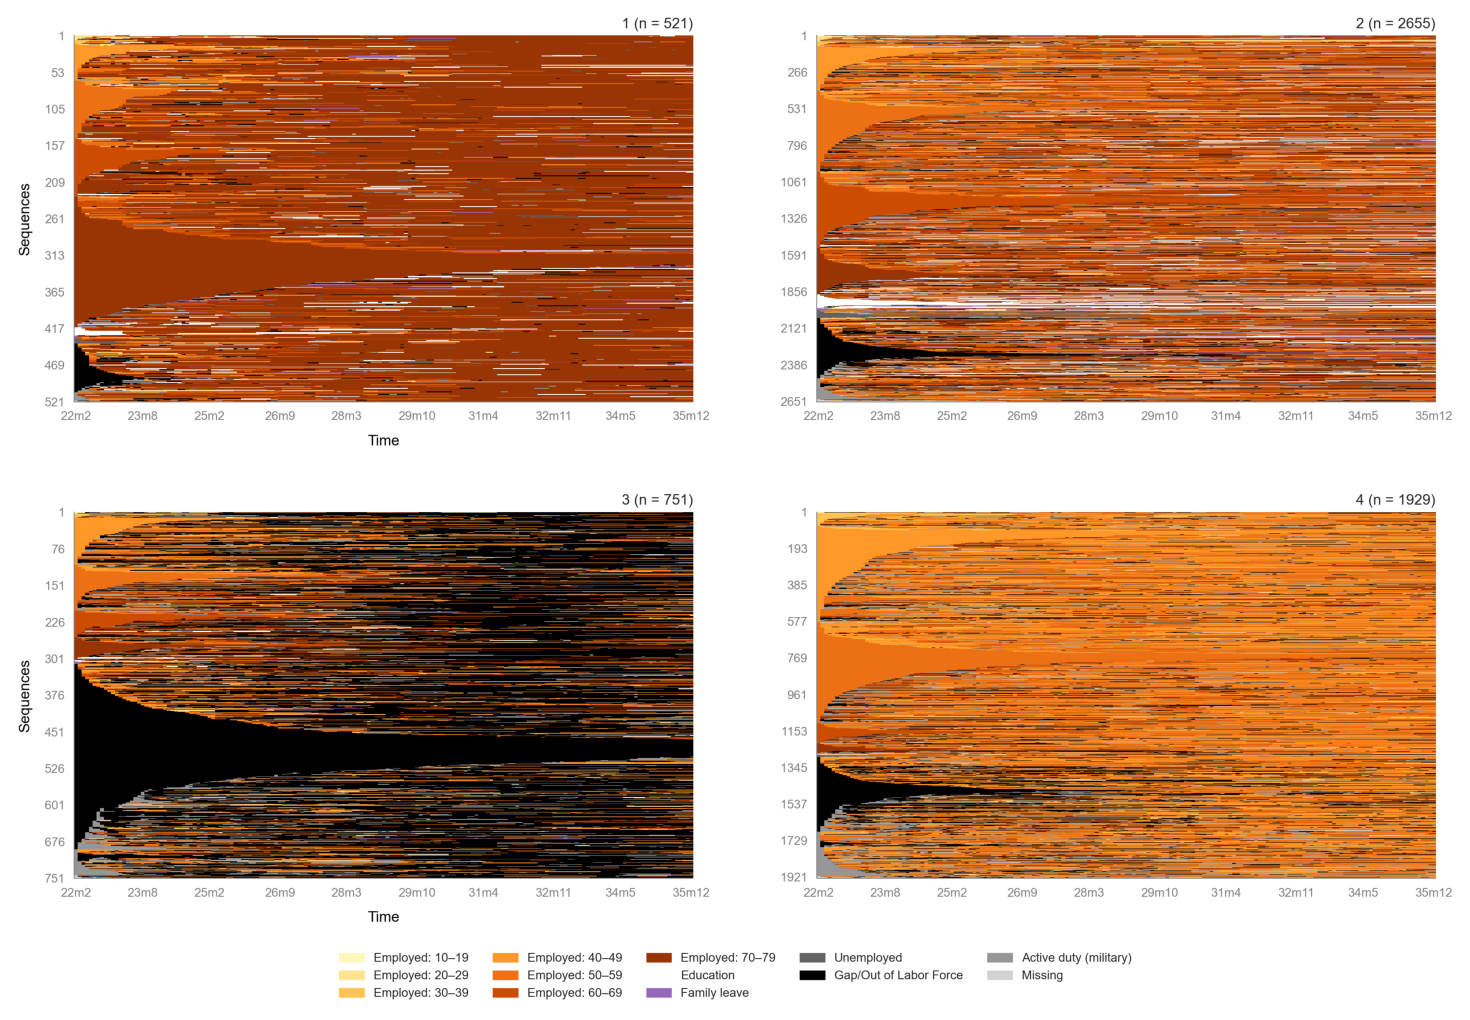

In [25]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster',
                    nrows=2,
                    ncols=2,
                    save_as='cluster_index_plot_4')


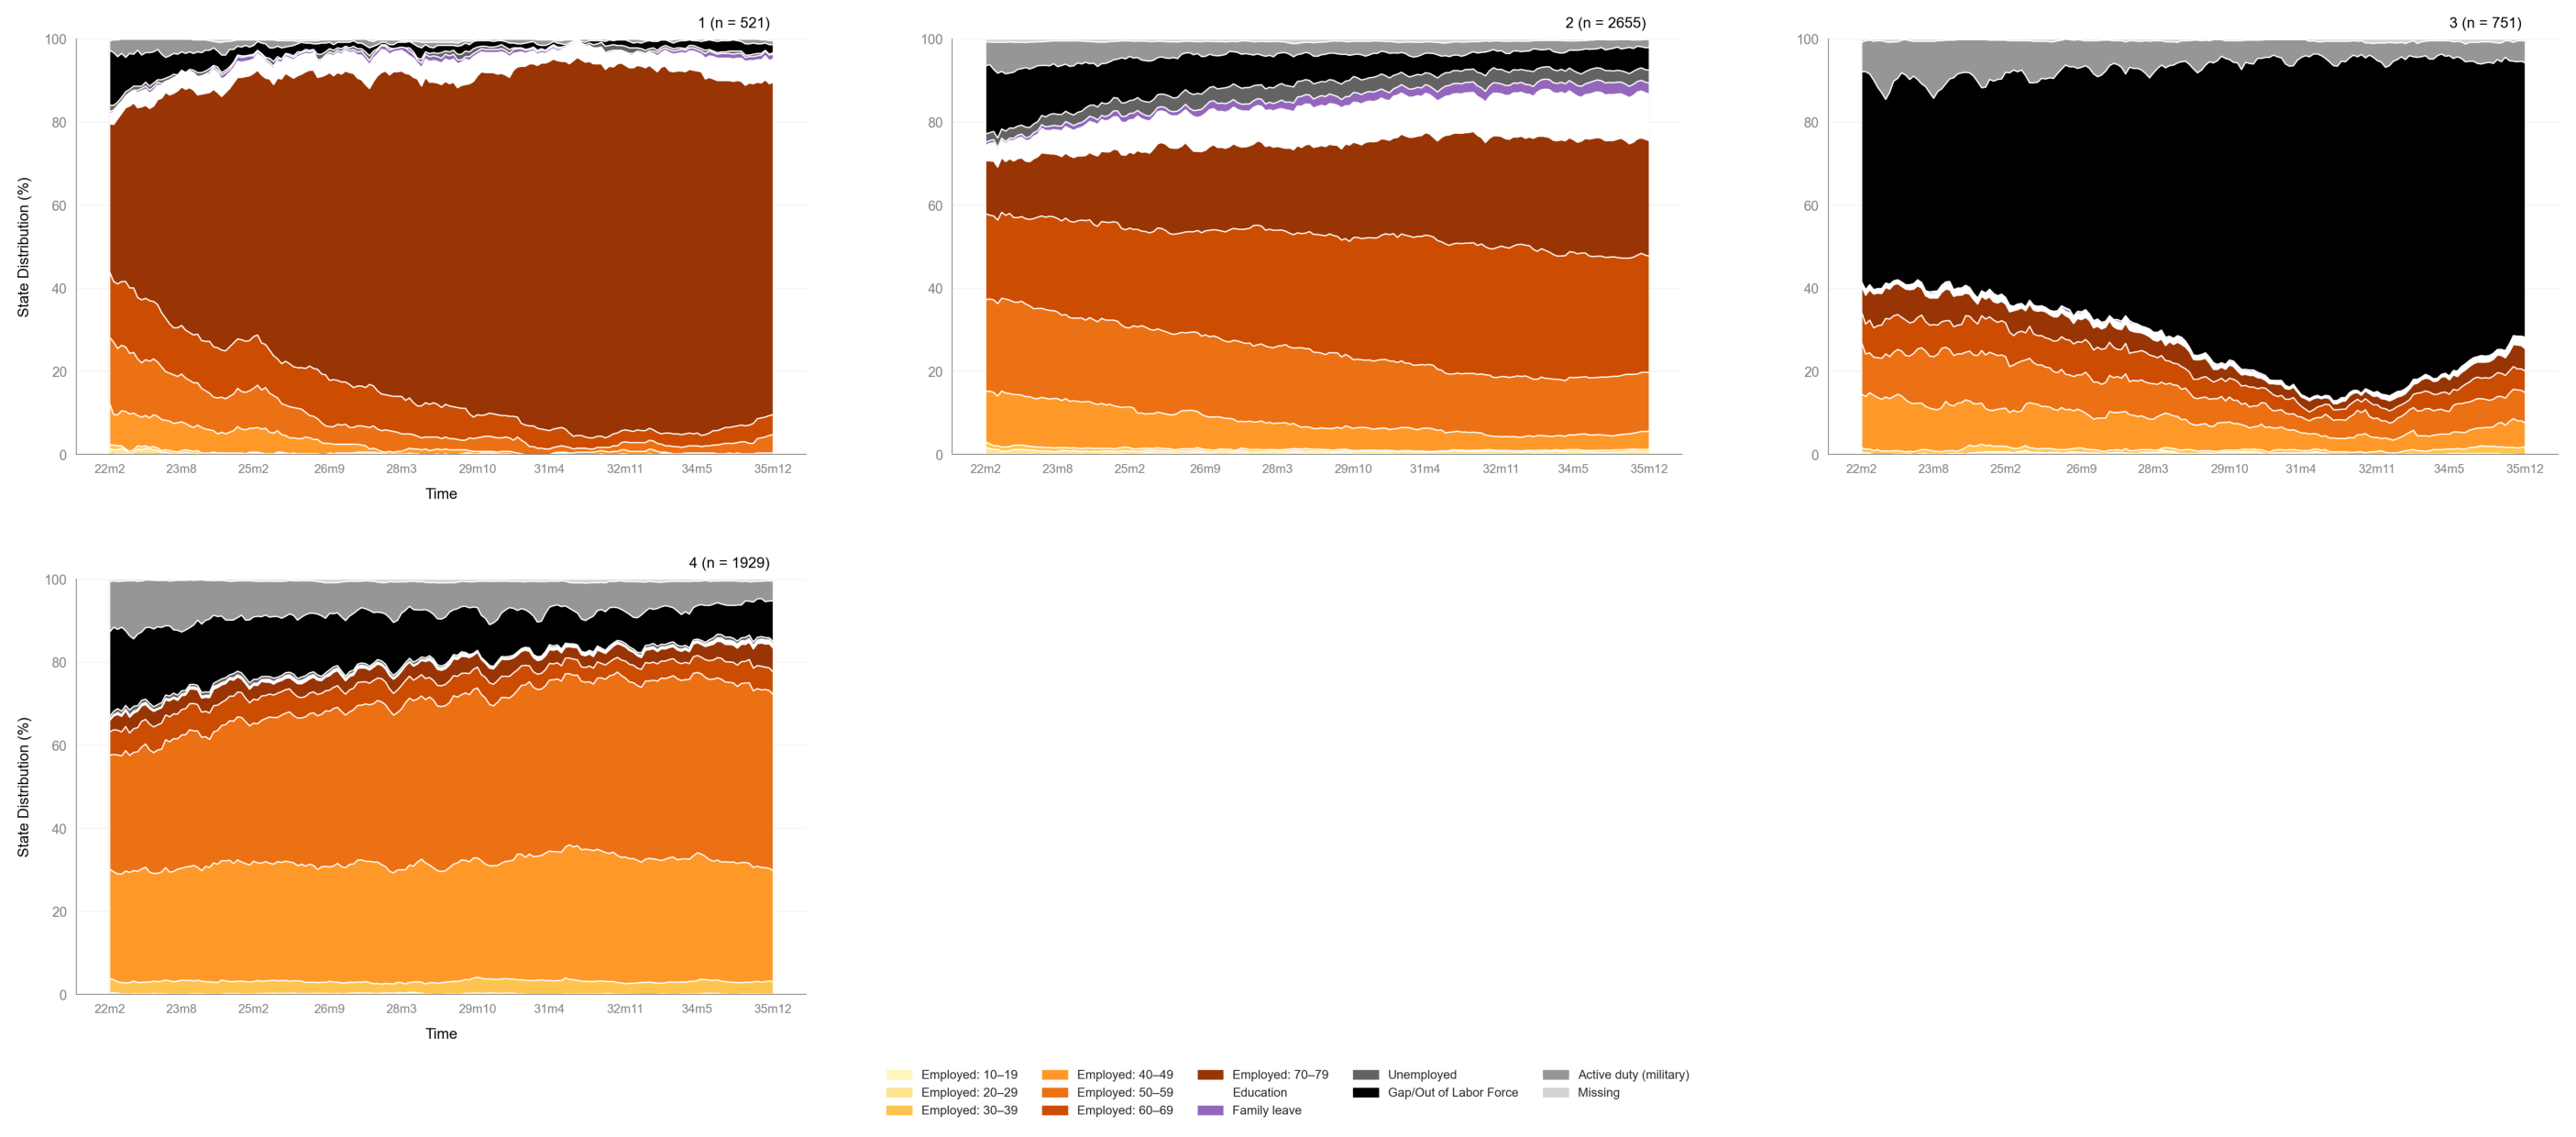

In [26]:
plot_state_distribution(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster',
                    nrows=3,
                    ncols=3,
                    save_as='cluster_index_plot_7')

In [28]:
membership_table

mapping_from_cluster_id_to_label = {
    1: 'Mostly full-time',
    2: 'Full-time fluctuation',
    3: 'Mixed',
    4: 'Mostly Out of Labor Force',
    5: 'Mostly blue-collar',
    6: 'Blue-collar fluctuation',
}

print(membership_table.dtypes)
membership_table['Cluster'] = membership_table['Cluster'].map(mapping_from_cluster_id_to_label)

membership_table
# ask how to change the value of a column based on this mapping dictionary
# Then run the index plot by cluster again

Entity ID    int64
Cluster      int32
dtype: object


Entity ID                    Cluster
0             2      Full-time fluctuation
1             3                      Mixed
2             6           Mostly full-time
3             8      Full-time fluctuation
4            11      Full-time fluctuation
...         ...                        ...
5851      12515  Mostly Out of Labor Force
5852      12516                      Mixed
5853      12517  Mostly Out of Labor Force
5854      12558                      Mixed
5855      12643      Full-time fluctuation

[5856 rows x 2 columns]

In [29]:
# Rename the column name from Entity ID to PID

membership_table = membership_table.rename(columns={'Entity ID': 'PID'})

membership_table

PID                    Cluster
0         2      Full-time fluctuation
1         3                      Mixed
2         6           Mostly full-time
3         8      Full-time fluctuation
4        11      Full-time fluctuation
...     ...                        ...
5851  12515  Mostly Out of Labor Force
5852  12516                      Mixed
5853  12517  Mostly Out of Labor Force
5854  12558                      Mixed
5855  12643      Full-time fluctuation

[5856 rows x 2 columns]

Merging to the original dataframe for regression

In [30]:

# Clean column names just in case
# df.columns = df.columns.str.strip()
# membership_table.columns = membership_table.columns.str.strip()

# Merge
df_with_cluster = df.merge(membership_table, on='PID', how='left')
df_with_cluster


Unnamed: 0    PID              race_recode sex_recode  medu  phealth_40  \
0              1      2  Non-Black, Non-Hispanic     Female     5           5   
1              2      3  Non-Black, Non-Hispanic     Female    10           1   
2              3      6  Non-Black, Non-Hispanic       Male    12           5   
3              4      8  Non-Black, Non-Hispanic     Female     9           3   
4              5     11  Non-Black, Non-Hispanic       Male    12           5   
...          ...    ...                      ...        ...   ...         ...   
5851        5852  12515                    Black     Female     8           5   
5852        5853  12516                    Black     Female     8           5   
5853        5854  12517                    Black       Male     7           5   
5854        5855  12558                    Black     Female    12           5   
5855        5856  12643                    Black       Male    -3           5   

      mhealth_40  birth_year  edu_age21  hl_age21  ...  35m4  35m5  35m6  \
0              6        1959          9         0  ...  10.0  10.0  10.0   
1              6        1962         10         0  ...  12.0  12.0  12.0   
2              5        1961         14         0  ...   8.0   8.0   7.0   
3              6        1959         12         1  ...   8.0   8.0   8.0   
4              6        1960         15         0  ...   4.0   4.0   4.0   
...          ...         ...        ...       ...  ...   ...   ...   ...   
5851           5        1959         10         0  ...   4.0   4.0   4.0   
5852           7        1960         12         0  ...  11.0  11.0  11.0   
5853           7        1963         12         0  ...   4.0   4.0   4.0   
5854           4        1959         11         0  ...  11.0  11.0  11.0   
5855           6        1958         12         0  ...   4.0   4.0   4.0   

      35m7  35m8  35m9  35m10  35m11  35m12                    Cluster  
0     10.0  10.0  10.0   10.0   10.0   10.0      Full-time fluctuation  
1     12.0   4.0   4.0   11.0   11.0   11.0                      Mixed  
2      7.0   7.0   7.0    7.0    7.0    7.0           Mostly full-time  
3      8.0   8.0   8.0    8.0    8.0    8.0      Full-time fluctuation  
4      4.0   4.0   4.0    4.0    4.0    4.0      Full-time fluctuation  
...    ...   ...   ...    ...    ...    ...                        ...  
5851   4.0   4.0   4.0    4.0    4.0    4.0  Mostly Out of Labor Force  
5852  11.0  11.0  11.0   11.0   11.0   11.0                      Mixed  
5853   4.0   4.0   4.0    4.0    4.0    4.0  Mostly Out of Labor Force  
5854  11.0  11.0  11.0   11.0   11.0   11.0                      Mixed  
5855   4.0   4.0   4.0    4.0    4.0    4.0      Full-time fluctuation  

[5856 rows x 179 columns]

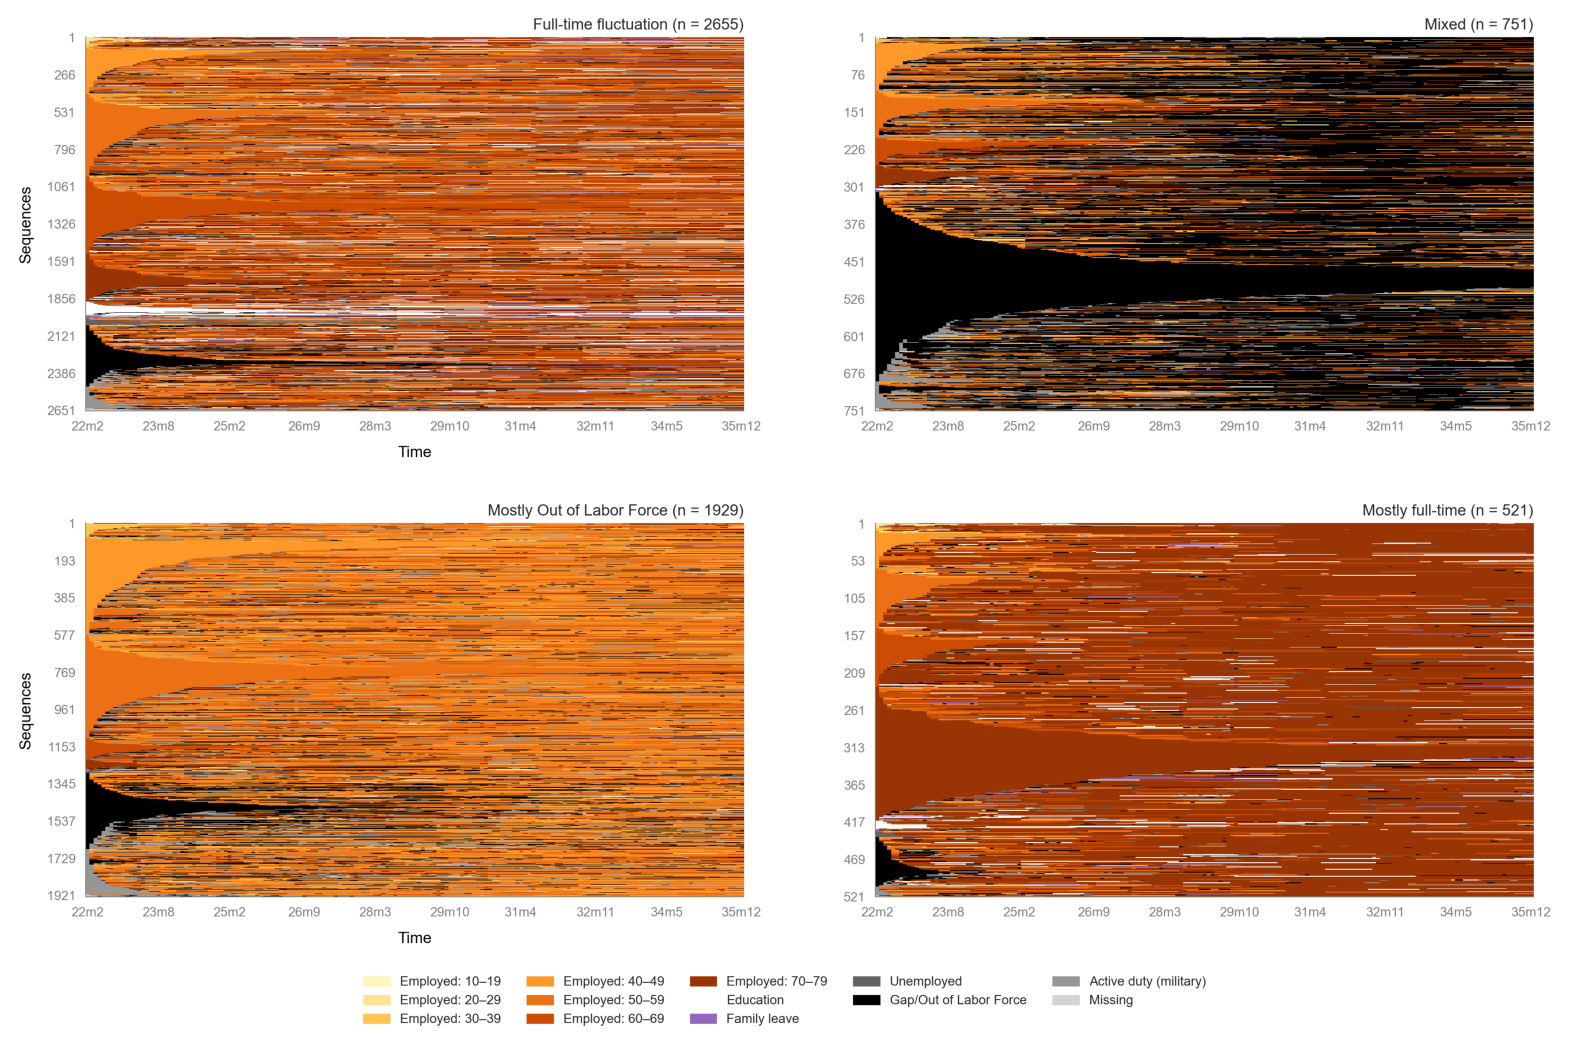

In [32]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster',
                    nrows=3,
                    ncols=2,
                    save_as='cluster_index_plot_6')

      Entity ID  Cluster
0             2        3
1             3        5
2             6        1
3             8        2
4            11        4
...         ...      ...
5851      12515        8
5852      12516        5
5853      12517        7
5854      12558        5
5855      12643        4

[5856 rows x 2 columns]
   Cluster  Count  Percentage
0        1    521        8.90
1        2    628       10.72
2        3    420        7.17
3        4   1607       27.44
4        5    751       12.82
5        6    671       11.46
6        7    416        7.10
7        8    842       14.38


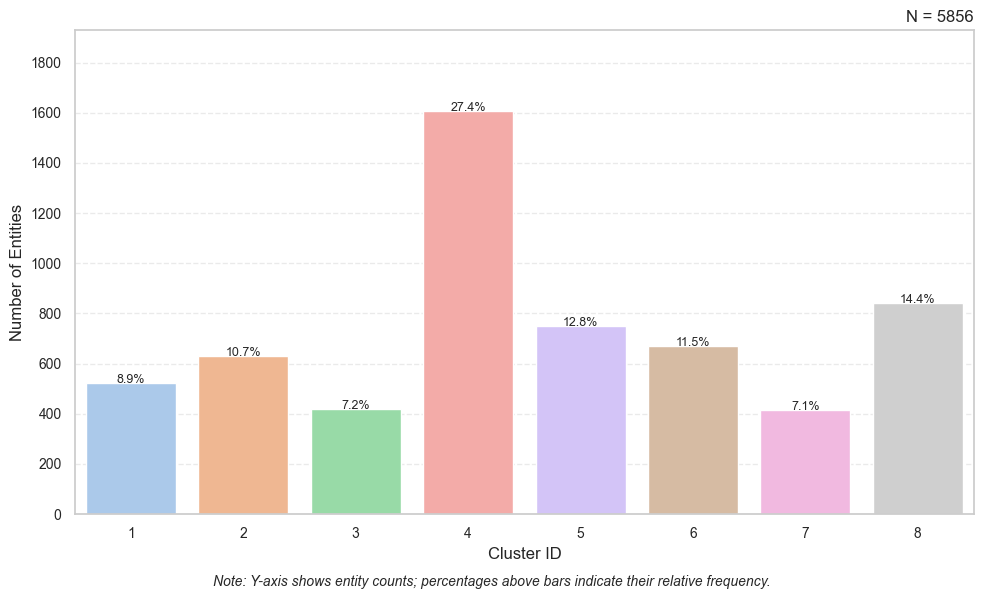

<Figure size 640x480 with 0 Axes>

In [33]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=8)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=8)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=8, save_as="distribution.png", title=None)

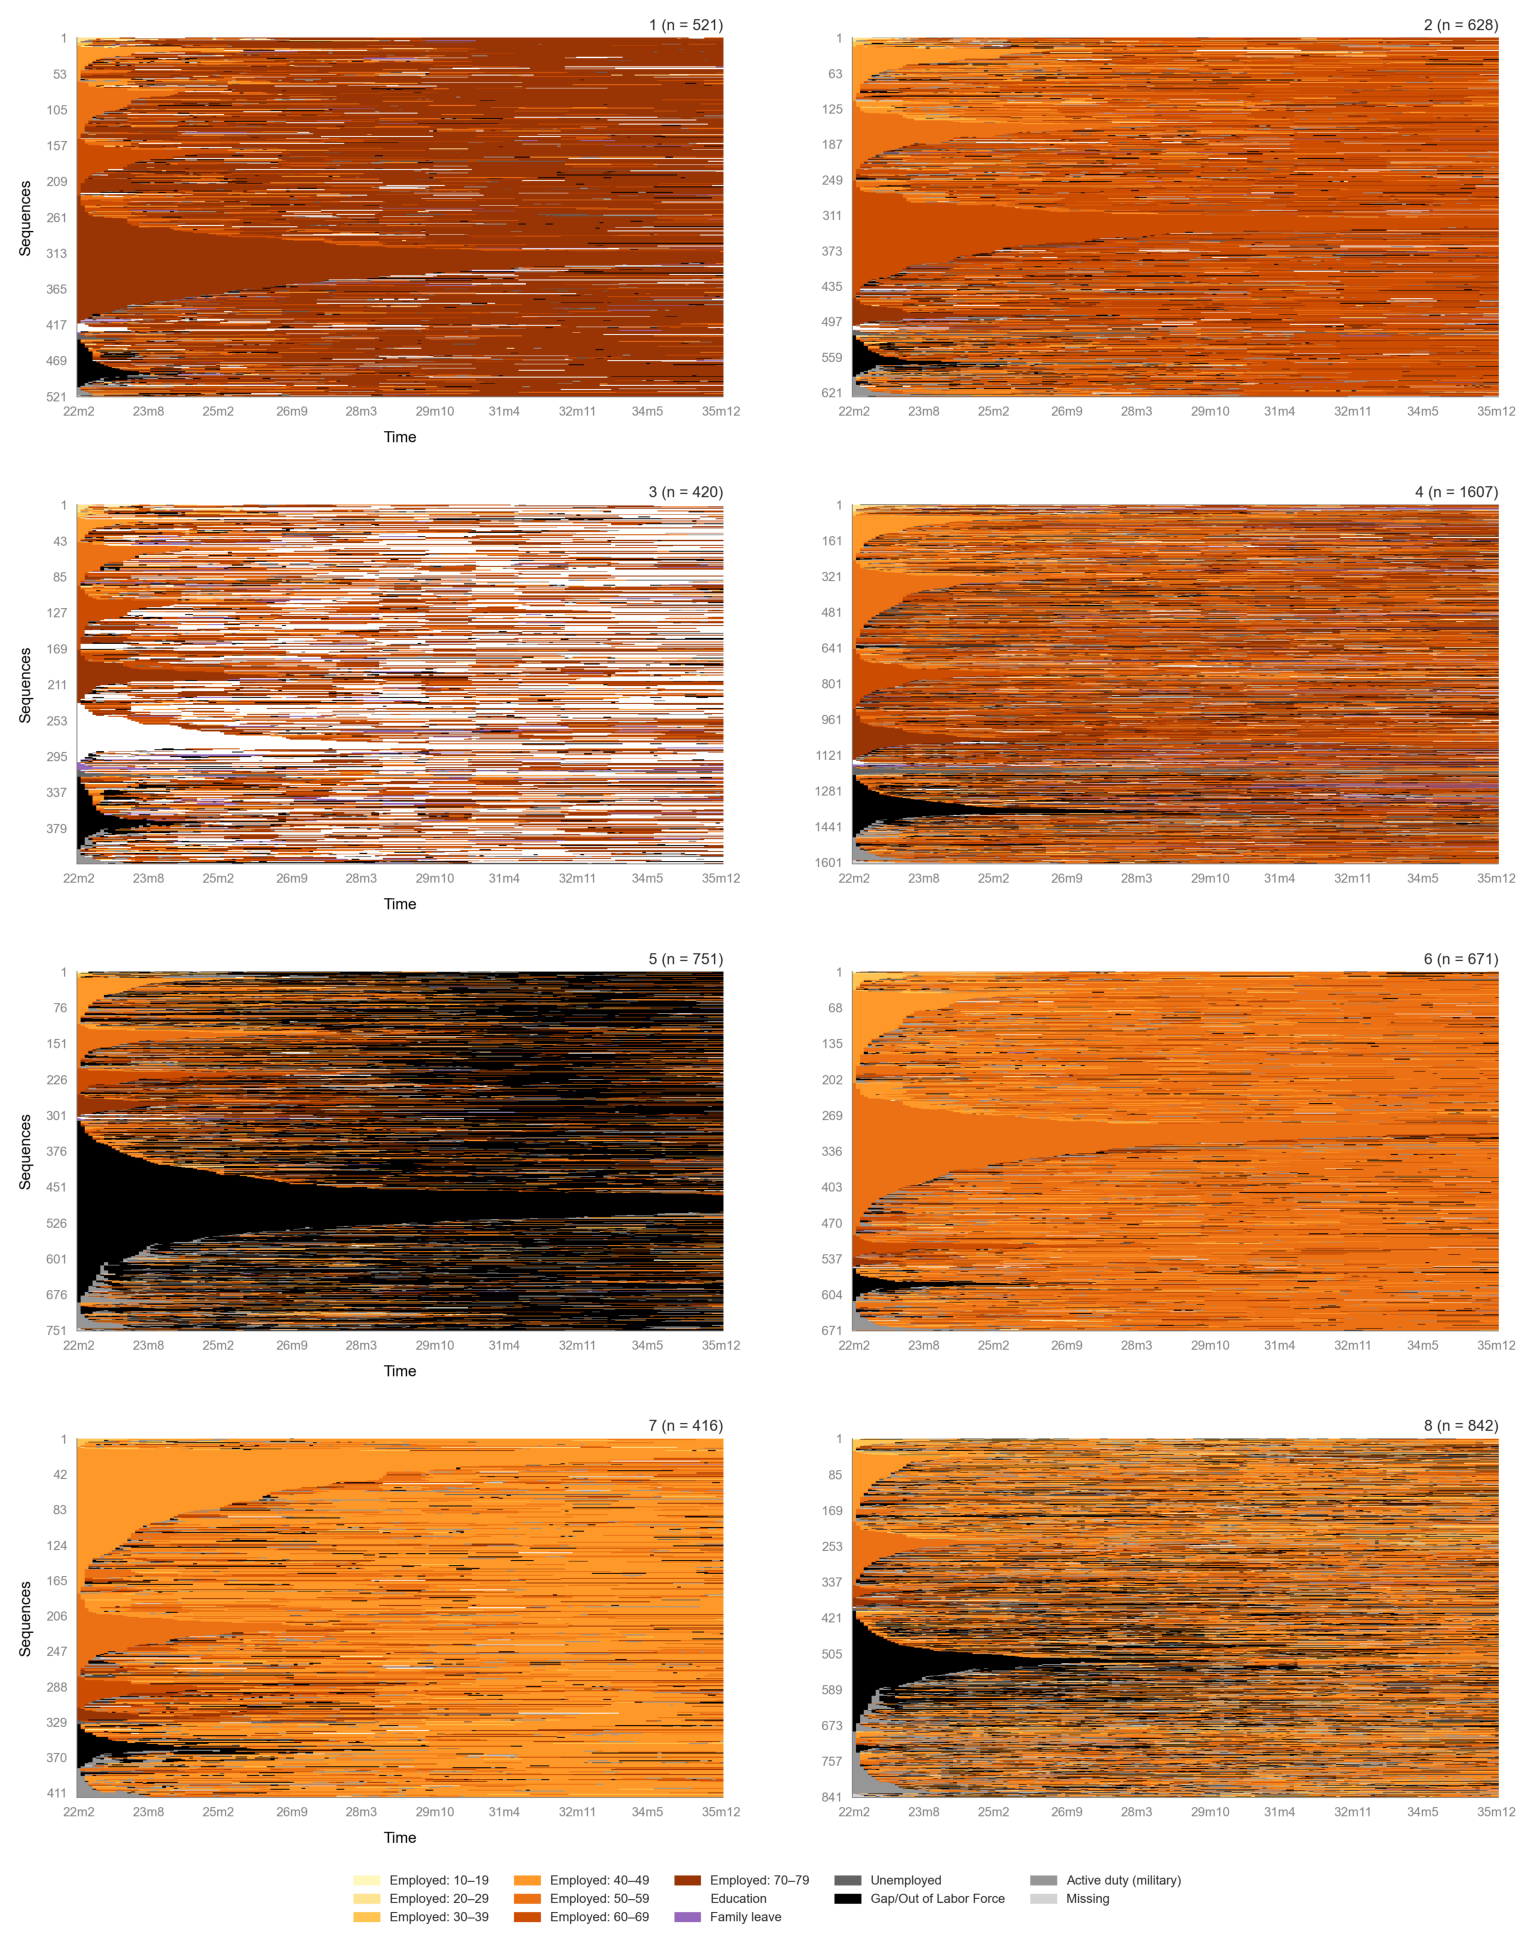

In [35]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster',
                    nrows=4,
                    ncols=2,
                    save_as='cluster_index_plot_8')

## wald cluster

In [38]:
cluster = Cluster(Omspell, sequence_data.ids, clustering_method='ward')


[>] Converting DataFrame to NumPy array...


Binary logit model

In [40]:
import pandas as pd
import statsmodels.api as sm

ImportError: cannot import name 'copy_if_needed' from 'scipy._lib._util' (E:\anaconda3\envs\python39\lib\site-packages\scipy\_lib\_util.py)

In [53]:
df

PID  25m01  25m02  25m03  25m04  25m05  25m06  25m07  25m08  25m09  \
0         2    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1         3    6.0    6.0    6.0    5.0    5.0    5.0    1.0    1.0    1.0   
2         6    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3         8    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4        13    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4320  12303    2.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0   
4321  12304    5.0    5.0    6.0    6.0    6.0    6.0    6.0    6.0    6.0   
4322  12305    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    6.0   
4323  12517    2.0    2.0    2.0    2.0    2.0    2.0    2.0    6.0    6.0   
4324  12558    5.0    5.0    5.0    5.0    6.0    5.0    6.0    3.0    6.0   

      ...  age_1990  age_1991  phealth_40  mhealth_40  pain_40  phealth_50  \
0     ...        31        32           5           6        1        4724   
1     ...        29        30           1           6        5        5762   
2     ...        29        30           5           5        1        4996   
3     ...        32        32           3           6        4        4458   
4     ...        31        32           5           6        1          -4   
...   ...       ...       ...         ...         ...      ...         ...   
4320  ...        28        28           5           6        1        3313   
4321  ...        30        31           5           6        1        5944   
4322  ...        29        30           5           6        1        5380   
4323  ...        28        28           5           7        1        5658   
4324  ...        31        32           5           4        3        2976   

      mhealth_50  pain_50  hl25  edu25  
0           5738        2   0.0     12  
1           4630        1   0.0     12  
2           5662        1   1.0     16  
3           3540        4   0.0     12  
4             -4       -4   0.0     15  
...          ...      ...   ...    ...  
4320        5816        3   0.0     12  
4321        4818        1   0.0     12  
4322        5792        1   0.0     12  
4323        6076        1   0.0     14  
4324        2162        5   0.0     12  

[4325 rows x 158 columns]

In [68]:
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
import pandas as pd

predictors = ['hl25', 'edu25', 'sex', 'medu', 'foreign_born']
models = []

# Loop through each cluster
for k in sorted(df_with_cluster['Cluster'].dropna().unique()):
    df_with_cluster[f'cluster{k}_binary'] = (df_with_cluster['Cluster ID'] == k).astype(int)

    # Subset data
    sub = df_with_cluster.dropna(subset=predictors + ['race', f'cluster{k}_binary'])

    # Create dummy variables for race
    dummies = pd.get_dummies(sub['race'], prefix='race', drop_first=True)

    # Combine predictors + dummies
    X = pd.concat([sub[predictors], dummies], axis=1)
    X = sm.add_constant(X)
    print('X', X)
    y = sub[f'cluster{k}_binary']
    print('y', y)


    # ✅ Fit the logistic regression model and append it
    X = X.astype(float)  # or use X = X.astype(int)
    model = sm.Logit(y, X).fit(disp=False)
    models.append(model)

# Create Stargazer table
stargazer = Stargazer(models)
stargazer.title("Logit Models: Cluster Membership vs. Others")

# Save to HTML
with open("logit_cluster_models.html", "w") as f:
    f.write(stargazer.render_html())


X       const  hl25  edu25  sex  medu  foreign_born  race_2  race_3
0       1.0   0.0     12    2     5             2   False    True
1       1.0   0.0     12    2    10             1   False    True
2       1.0   1.0     16    1    12             1   False    True
3       1.0   0.0     12    2     9             1   False    True
4       1.0   0.0     15    1    12             1   False    True
...     ...   ...    ...  ...   ...           ...     ...     ...
4320    1.0   0.0     12    2     7             1    True   False
4321    1.0   0.0     12    2    11             1    True   False
4322    1.0   0.0     12    1     9             1    True   False
4323    1.0   0.0     14    1     7             1    True   False
4324    1.0   0.0     12    2    12             1    True   False

[4178 rows x 8 columns]
y 0       0
1       0
2       0
3       0
4       0
       ..
4320    0
4321    0
4322    0
4323    0
4324    0
Name: clusterBlue-collar fluctuation_binary, Length: 4178, dtype: int

In [69]:
models